In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


In [3]:
# Step 1: Data Collection and Preprocessing
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


In [4]:
# Step 2: Model Definition
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

/Users/fourofour/Professional/Jio-2024/WarmHole/ops_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [5]:




# Step 3: Model Training
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))



Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.2638 - loss: 2.7603 - val_accuracy: 0.4502 - val_loss: 1.5404
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4872 - loss: 1.4315 - val_accuracy: 0.5227 - val_loss: 1.3344
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5532 - loss: 1.2581 - val_accuracy: 0.5716 - val_loss: 1.2283
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6066 - loss: 1.1314 - val_accuracy: 0.5850 - val_loss: 1.1945
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6360 - loss: 1.0362 - val_accuracy: 0.6249 - val_loss: 1.0755
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6675 - loss: 0.9568 - val_accuracy: 0.6288 - val_loss: 1.0841
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6914 - loss: 0.8891 - val_accuracy: 0.6487 - val_loss: 1.0580
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7077 - lo

In [7]:
# Step 4: Model Evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Step 5: Model Deployment (Export and Deploy)
# Export model for deployment
model.save('image_classifier.keras')

# Deploy the model to your desired deployment environment
# (e.g., TensorFlow Serving, TensorFlow.js, TensorFlow Lite)


313/313 - 1s - 4ms/step - accuracy: 0.6552 - loss: 1.0731

Test accuracy: 0.6552000045776367


# Loading the Saved Model. 

- Please note that once the model has been trained and saved, we don't need any data / code which was required to train the model.



In [9]:
import tensorflow as tf
import numpy as np
from PIL import Image

In [10]:
# Load the trained model
model = tf.keras.models.load_model('image_classifier.keras')


In [13]:
type( model ) 

keras.src.models.sequential.Sequential

In [41]:
# Define class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [42]:
# Load and preprocess new image
image_path = 'test_data/test_truck.jpeg'


In [43]:
image_path

'test_data/test_truck.jpeg'

In [44]:
img = Image.open(image_path)

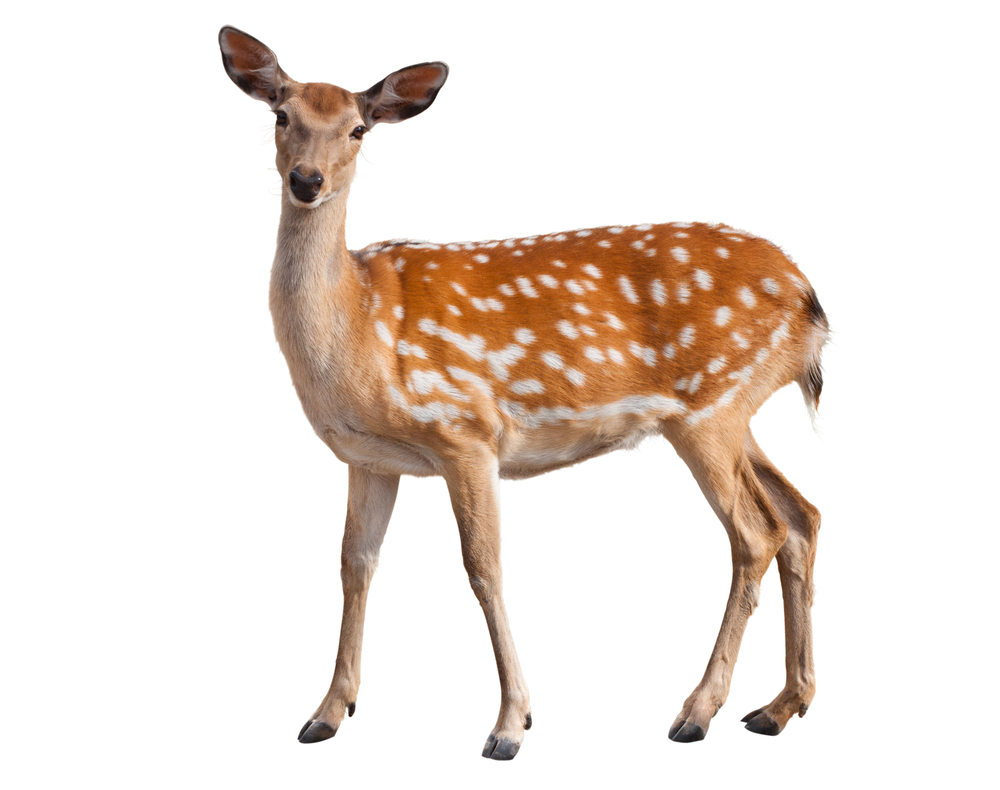

In [45]:
img

In [46]:
img = img.resize((32, 32))  # Resize to match model input shape


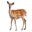

In [47]:
img

In [48]:
img_array = np.expand_dims(np.array(img) / 255.0, axis=0)  # Normalize pixel values and add batch dimension


In [49]:
img_array

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]])

In [50]:
# Make predictions
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [52]:
# Print predicted class label
print( predicted_class ) 
print("Predicted class:", class_names[predicted_class])


4
Predicted class: deer
